# Vacant Properties in Pittsburgh

(Data from [Western Pennsylvania Regional Data Center](https://data.wprdc.org/dataset/city-owned-properties))

This notebook will discuss an important topic when deciding the best neighborhood in Pittsburgh: **which neighborhood has the fewest abandoned buildings?**

While data on total 'abandoned buildings' is hard to come by, we have a data set for all **city-owned properties** in Pittsburgh, including many vacant ones. Let's check it out.

## Looking at our data

In [86]:
# import pandas
import pandas as pd
import matplotlib.pyplot as plt

# turn csv into data frame
props = pd.read_csv("city-owned-properties.csv",index_col="_id") # use the column named _id as the row index

# check some random values in the dataframe
props.sample(5)

,id,pin,address,owner,parc_sq_ft,class,zoned_as,inventory_type,current_status,acquisition_method,...,longitude,census_tract,neighborhood_name,council_district,ward,fire_zone,police_zone,dpw_streets,dpw_enviro,dpw_parks
_id,,,,,,,,,,,,,,,,,,,,,
1350607,183739,0081R00111000000,5238 MOSSFIELD ST,City of Pittsburgh,1298.0,Vacant Land,H,Hold For Study,Hold for Study,NaN,...,-79.937677,4.200310e+10,Garfield,9.0,10.0,3-4,5.0,2.0,Central,Highland
1346132,983106,0015D00116000000,61 PASADENA ST,City of Pittsburgh,2700.0,Vacant Land,R1D-H,Public Sale,Available for Sale,Treasurer Sale,...,-80.001531,4.200318e+10,Mount Washington,3.0,18.0,4-5,3.0,5.0,Southern,Emerald
1346692,178804,0162P00128000000,140 ARENDELL ST,City of Pittsburgh,7500.0,Vacant Land,P,Greenway,Permanent City Ownership,Treasurer Sale,...,-80.025952,4.200326e+10,Perry North,1.0,26.0,1-15,1.0,1.0,Northern,Riverview
1344184,914440,0173J00323000000,7109 MINGO ST,City of Pittsburgh,6400.0,Vacant Land,RM-M,Hold for Study,Hold for Study,Treasurer Sale,...,-79.895871,4.200356e+10,Lincoln-Lemington-Belmar,9.0,12.0,3-18,5.0,2.0,Eastern,Highland
1354951,175418,0046M00017000000,2161 HAZELTON ST,City of Pittsburgh,2500.0,Vacant Land,H,Hold For Study,Hold for Study,Treasurer Sale,...,-80.003088,4.200325e+10,Fineview,1.0,25.0,1-10,1.0,1.0,Northern,Riverview


Above is a brief sample of some of the data. **That's a lot of information.** Just for fun, let's see what the biggest property is:

In [87]:
props['parc_sq_ft'].max()

18164520.0

## Narrowing it down

Some googling reveals that the property mentioned above, the largest in the dataset (by area) is actually **Schenley Park.**

Let's make sure we only count land that isn't used for a good purpose. This next section of code will include only parcels of land in the category **"vacant land"** and exclude parks.

In [88]:
# query mask: vacant land (and not a park)
vacant = (props['inventory_type'] != "Park") & (props['class'] == "Vacant Land")
vacants = props[vacant]
vacants['neighborhood_name'].value_counts()

Hazelwood                    810
Perry South                  788
Larimer                      518
Homewood North               487
Garfield                     376
Sheraden                     366
Perry North                  355
Homewood South               349
Beltzhoover                  344
Lincoln-Lemington-Belmar     335
Middle Hill                  324
California-Kirkbride         257
Fineview                     251
Spring Hill-City View        250
Elliott                      231
New Homestead                225
Brookline                    214
South Side Slopes            203
South Oakland                189
Beechview                    179
Crafton Heights              176
Homewood West                175
Marshall-Shadeland           160
West Oakland                 157
Brighton Heights             156
Upper Hill                   154
Carrick                      150
Polish Hill                  140
East Hills                   139
Crawford-Roberts             134
Allentown 

That was the **total quantity** of properties. However, we have the area, so let's take sums of areas instead of counting (because a larger abandoned building or plot of land should hold more weight than a small one).

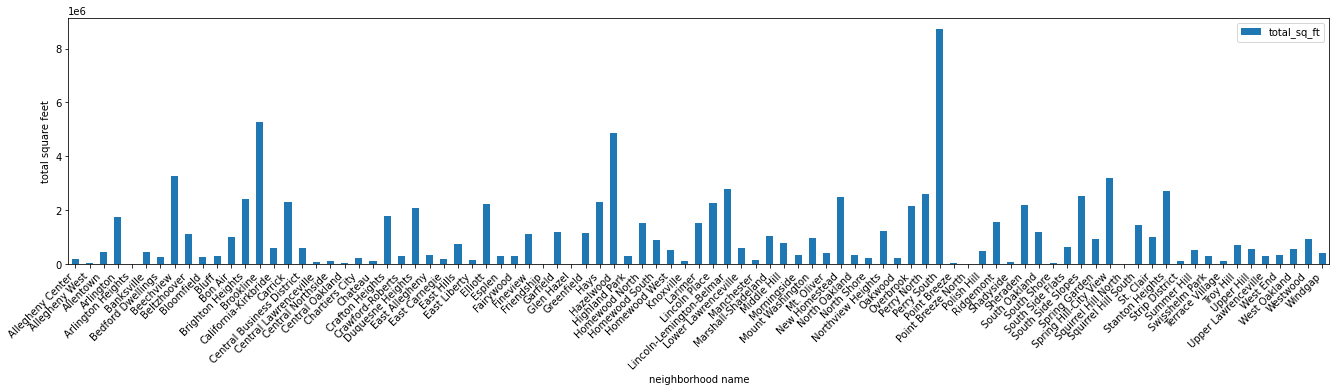

In [89]:
# a new dataframe with only the vacant land included
areas = vacants.groupby('neighborhood_name')['parc_sq_ft'].sum().reset_index()
areas.rename(columns={'parc_sq_ft': 'total_sq_ft'}, inplace=True)
areas.set_index('neighborhood_name', inplace=True)

# create the graph
areas.plot(kind='bar')
plt.gcf().set_size_inches(18, 6)
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.xlabel('neighborhood name')
plt.ylabel('total square feet')
plt.show()

That list is in alphabetical order. Let's try ordering it by total area.

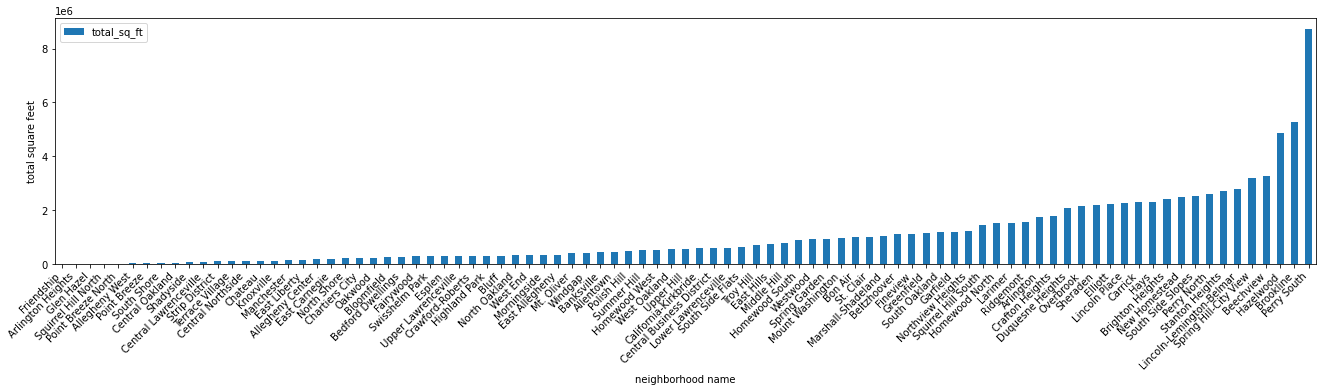

In [90]:
# sort everything by area
areas.sort_values(by='total_sq_ft', inplace=True)

# create the graph
areas.plot(kind='bar')
plt.gcf().set_size_inches(18, 6)
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.xlabel('neighborhood name')
plt.ylabel('total square feet')
plt.show()

## Scoring neighborhoods
The data looks like it loosely follows a log scale. In order to assign each neighborhood a score (out of 10), let's find some arbitrary **calculations** including a **log operation** that bound all neighborhoods between 0 and 10. Everything will need to be made **negative** to make sure that more vacant land correlates with a lower score.

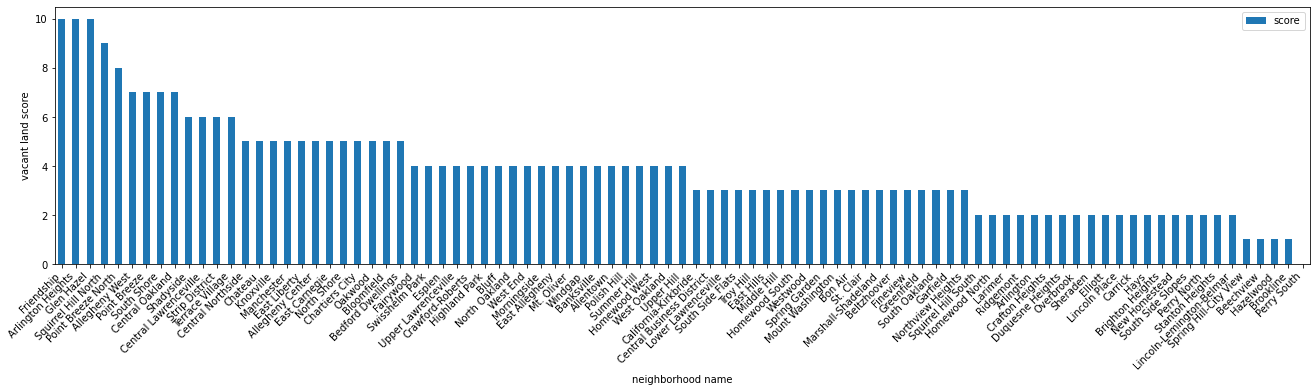

In [91]:
import math

scores = pd.DataFrame(index=areas.index) # the new dataframe

for idx in scores.index:
    # the line below calculates the score using log base 10
    score = -1 * round(((math.log(areas.loc[idx, 'total_sq_ft'],10) - 4.75)*2.95)-6.5)
    scores.loc[idx, 'score'] = score

# once again, create the graph
scores.plot(kind='bar')
plt.gcf().set_size_inches(18, 6)
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.xlabel('neighborhood name')
plt.ylabel('vacant land score')
plt.show()

#### This graph shows every neighborhood with its vacant land score.

And there you have it! Our biggest winners are **Friendship**, **Arlington Heights**, and **Glen Hazel**, but many others are not far behind. Faring the worst is Perry South (achieving the only score of 0), but I'm sure the neighborhood has other redeeming qualities.

# Introduction
For this project, my focus was on identifying neighborhoods with the highest concentration of baseball fields. I wanted to do this because I felt finding the best place to live would be based on activities that would make you active and happy, playing baseball being one of those activities. So finding this dataset was the perfect match to find a correlation to best neighborhood and happiness

# Metric
My main metric was the amount of baseball fields in each neighborhood and then that number was divded by the greatest number of baseball fields in one are and multiplied by 10 which gave us a score out of 10 for each neighborhood

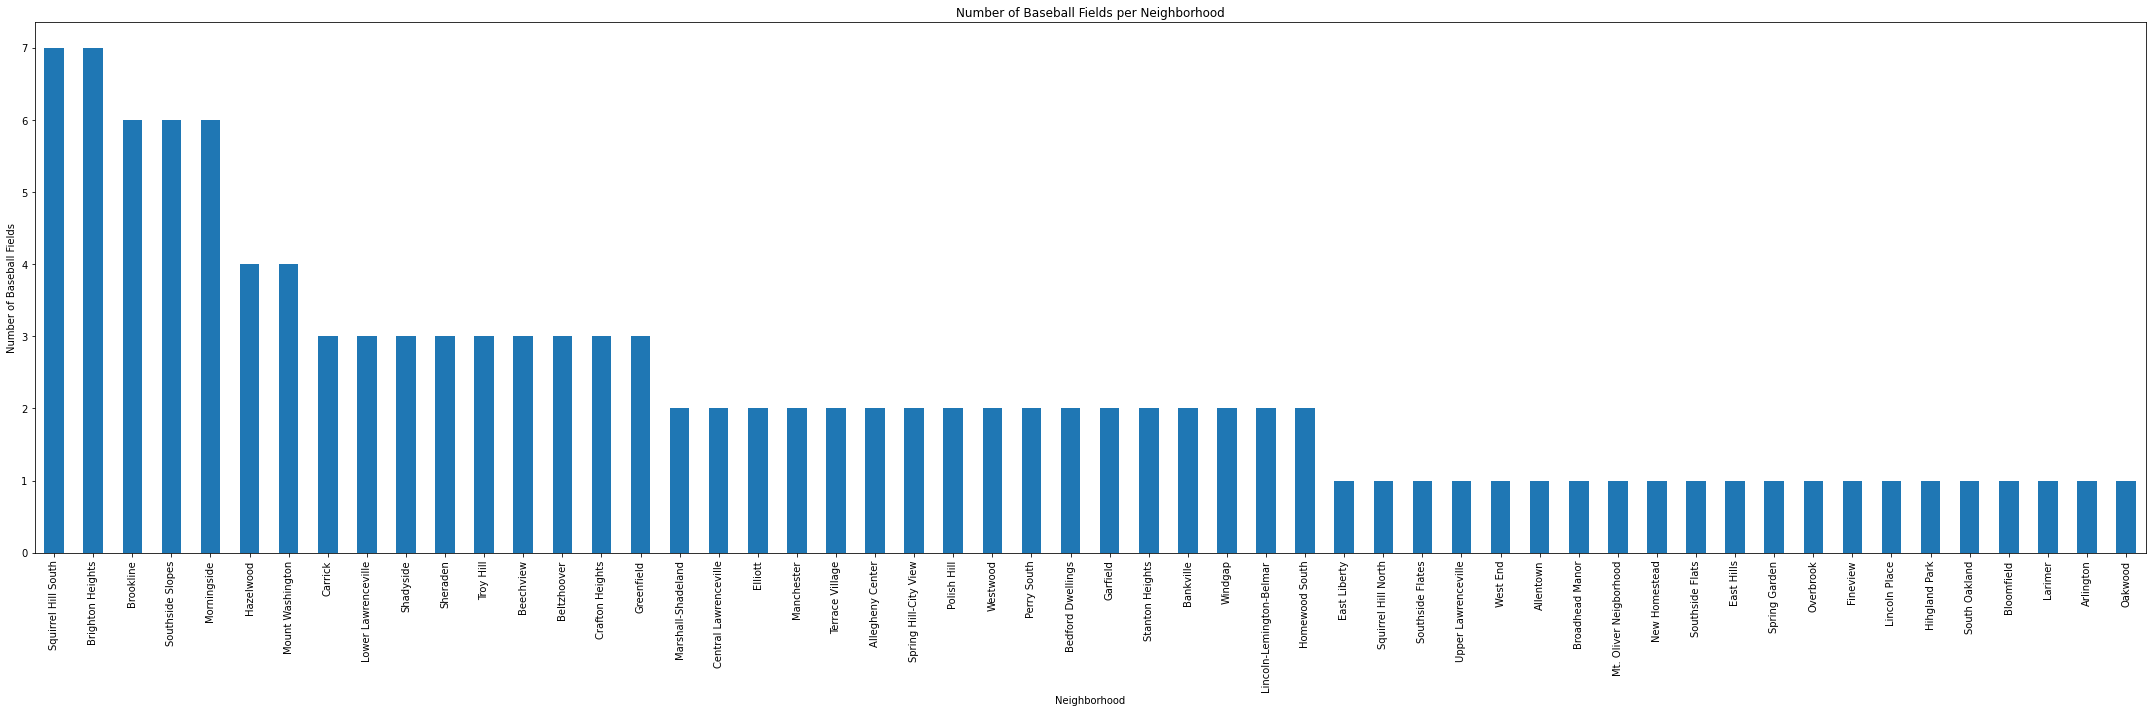

Squirrel Hill South         10.000000
Brighton Heights            10.000000
Brookline                    8.571429
Southside Slopes             8.571429
Morningside                  8.571429
Hazelwood                    5.714286
Mount Washington             5.714286
Carrick                      4.285714
Lower Lawrenceville          4.285714
Shadyside                    4.285714
Sheraden                     4.285714
Troy Hill                    4.285714
Beechview                    4.285714
Beltzhoover                  4.285714
Crafton Heights              4.285714
Greenfield                   4.285714
Marshall-Shadeland           2.857143
Central Lawrenceville        2.857143
Elliott                      2.857143
Manchester                   2.857143
Terrace Village              2.857143
Allegheny Center             2.857143
Spring Hill-City View        2.857143
Polish Hill                  2.857143
Westwood                     2.857143
Perry South                  2.857143
Bedford Dwel

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


df = pd.read_csv('baseball.csv')

neighborhood_counts = df['Neighborhood'].value_counts()

plt.figure(figsize=(30, 10))
neighborhood_counts.plot(kind='bar')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Baseball Fields')
plt.title('Number of Baseball Fields per Neighborhood')
plt.tight_layout()
plt.show()

max_count = neighborhood_counts.max()
neighborhood_scores = (neighborhood_counts / max_count) * 10
print(neighborhood_scores)


# Conclusion
I used the data from the Excel spreadsheet to give a rating to each neighborhood focusing on how many baseball fields were present, in each area. The rating was based on the count of baseball fields in each neighborhood. The neighborhood with the most baseball fields, which was 7 in this instance set the standard for comparison. To calculate the rating for each neighborhood I divided the number of baseball fields in that area by the number in the best performing neighborhood. This method allowed for an assessment of neighborhoods based on their access, to baseball fields. This allowed me to make the conclusion that Squirrel Hill South, Brighton Heights, Brookline, Southside Slopes and Morningwood were the best neighborhoods based on this metric


# Introduction
My name is Christopher McEnroe, and to determine 'Pittsburgh's Best Neighborhood,' I am examining the neighborhood with the highest number of playgrounds. Playgrounds are meant to be places of happiness for young children, where they can develop social skills, motor skills, and build confidence. Based on this, we can conclude that the more playgrounds a neighborhood has, the better it is.

## Metric 
I calculated the scores by identifying the neighborhood with the highest number of playgrounds and setting that count as the max_count. Then, I divided the number of playgrounds in each neighborhood by the max_count to determine the score

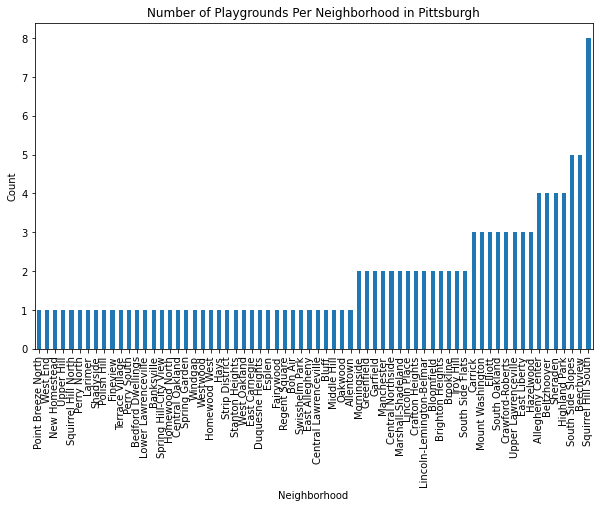

Squirrel Hill South         10.00
Beechview                    6.25
South Side Slopes            6.25
Highland Park                5.00
Sheraden                     5.00
Beltzhoover                  5.00
Allegheny Center             5.00
Carrick                      3.75
Mount Washington             3.75
Elliott                      3.75
South Oakland                3.75
Hazelwood                    3.75
Crawford-Roberts             3.75
Upper Lawrenceville          3.75
East Liberty                 3.75
Morningside                  2.50
Lincoln Place                2.50
Greenfield                   2.50
Garfield                     2.50
Manchester                   2.50
Central Northside            2.50
Marshall-Shadeland           2.50
South Side Flats             2.50
Crafton Heights              2.50
Lincoln-Lemington-Belmar     2.50
Bloomfield                   2.50
Brighton Heights             2.50
Brookline                    2.50
Troy Hill                    2.50
Oakwood       

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data with the neighborhood as the index
playgrounds = pd.read_csv("playground.csv", index_col='neighborhood')

# Count occurrences per neighborhood
neigh_counts = playgrounds.index.value_counts()

# Sort counts for better visualization
neigh_counts_sorted = neigh_counts.sort_values()

# Plot the sorted neighborhood counts
plt.figure(figsize=(10, 6))  
neigh_counts_sorted.plot(kind='bar')
plt.title('Number of Playgrounds Per Neighborhood in Pittsburgh')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.show()

# Find the maximum count of playgrounds in any neighborhood
max_count = neigh_counts.max()  

# Calculate a "playground score" relative to the maximum
playground_score = (neigh_counts / max_count) * 10
print(playground_score)

# Conclusion
In conclusion, based on the data, the best neighborhoods include Squirrel Hill South (10.00), Beechview (6.25), South Side Slopes (6.25), Highland Park (5.00), and Sheraden (5.00), which scored the highest out of all the neighborhoods according to the metric. The worst neighborhoods, including Esplen (1.25), Fairywood (1.25), Regent Square (1.25), Allentown (1.25), and East Allegheny (1.25), scored the lowest on the metric. Based on the data, Squirrell Hill South is statitically the best neighborhood. 

# The best neighborhood based on all 3 metrics

To determine which neighborhood is the best, we will combine all 3 metrics from the individual notebooks: presence of playgrounds, presence of baseball fields, and absence of abandoned buildings. This will give us an overall **neighborhood wellness score** for all neighborhoods that includes 

In the previous notebooks, 3 individual scores were calculated. Let's bring those in.

(Below is the code from the 3 individual notebooks to calculate scores)

In [96]:
import pandas as pd
props = pd.read_csv("city-owned-properties.csv",index_col="_id") # use the column named _id as the row index
vacant = (props['inventory_type'] != "Park") & (props['class'] == "Vacant Land")
vacants = props[vacant]
areas = vacants.groupby('neighborhood_name')['parc_sq_ft'].sum().reset_index()
areas.rename(columns={'parc_sq_ft': 'total_sq_ft'}, inplace=True)
areas.set_index('neighborhood_name', inplace=True)
areas.sort_values(by='total_sq_ft', inplace=True)
import math
scores = pd.DataFrame(index=areas.index) # the new dataframe
for idx in scores.index:
    score = -1 * round(((math.log(areas.loc[idx, 'total_sq_ft'],10) - 4.75)*2.95)-6.5)
    scores.loc[idx, 'score'] = score
    

vacants_series = scores.stack().droplevel(level=1)
a_vacants = vacants_series.sort_index(level='neighborhood_name')

from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv('baseball.csv')
neighborhood_counts = df['Neighborhood'].value_counts()
max_count = neighborhood_counts.max()
neighborhood_scores = (neighborhood_counts / max_count) * 10
a_baseball = neighborhood_scores.sort_index(level=0)

playgrounds = pd.read_csv("playground.csv", index_col='neighborhood')
neigh_counts = playgrounds.index.value_counts()
neigh_counts_sorted = neigh_counts.sort_values()
max_count = neigh_counts.max()  
playground_score = (neigh_counts / max_count) * 10
a_playgrounds = playground_score.sort_index(level=0)
# now combine all the scores together
total_scores = a_vacants.add(a_baseball, fill_value=0).add(a_playgrounds, fill_value=0)
average_scores = total_scores/2.2
pd.set_option('display.max_rows', None)
average_scores

Allegheny Center              5.844156
Allegheny West                3.181818
Allentown                     3.035714
Arlington                     1.558442
Arlington Heights             4.545455
Banksville                    2.386364
Bankville                     1.298701
Bedford Dwellings             4.139610
Beechview                     5.243506
Beltzhoover                   5.584416
Bloomfield                    4.058442
Bluff                         2.386364
Bon Air                       1.931818
Brighton Heights              6.590909
Broadhead Manor               0.649351
Brookline                     5.487013
California-Kirkbride          1.363636
Carrick                       4.561688
Central Business District     1.363636
Central Lawrenceville         4.594156
Central Northside             3.409091
Central Oakland               3.750000
Chartiers City                2.272727
Chateau                       2.272727
Crafton Heights               3.993506
Crawford-Roberts         

### Those are all of the collective scores, now let's put them in order and put them on a graph

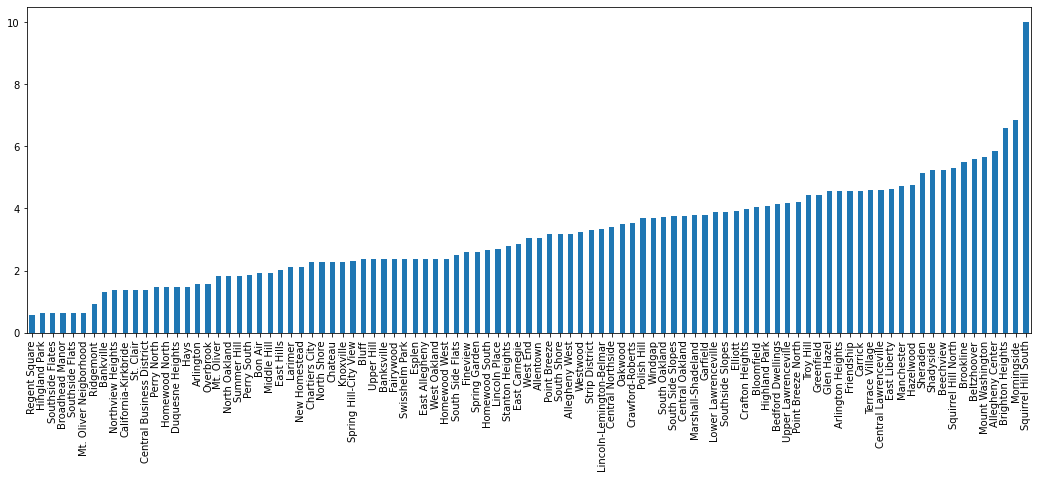

In [97]:
import matplotlib.pyplot as plt
a_scores = average_scores.sort_values()
a_scores.plot(kind='bar')
plt.gcf().set_size_inches(18, 6)

## Based on these 3 combined metrics, the neighborhood with the best 'Neighborhood Wellness Score' is Squirrel Hill South.

The worst neighborhood in Pittsburgh is **Regent Square**

### Final Thoughts
While playgrounds, baseball fields, and lack of abandoned buildings may not always correlate, Squirrel Hill South is the clear winner. It even won 2/3 of the categories. We still think that Oakland is the best neighborhood, so maybe this data doesn't give you the full picture.